<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/J078_Remedial_Assign_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remedial Assignment No : 4

#Roll No: J078

##Credit-g Classification Problem

### This dataset classifies people described by a set of attributes as good or bad credit risks.



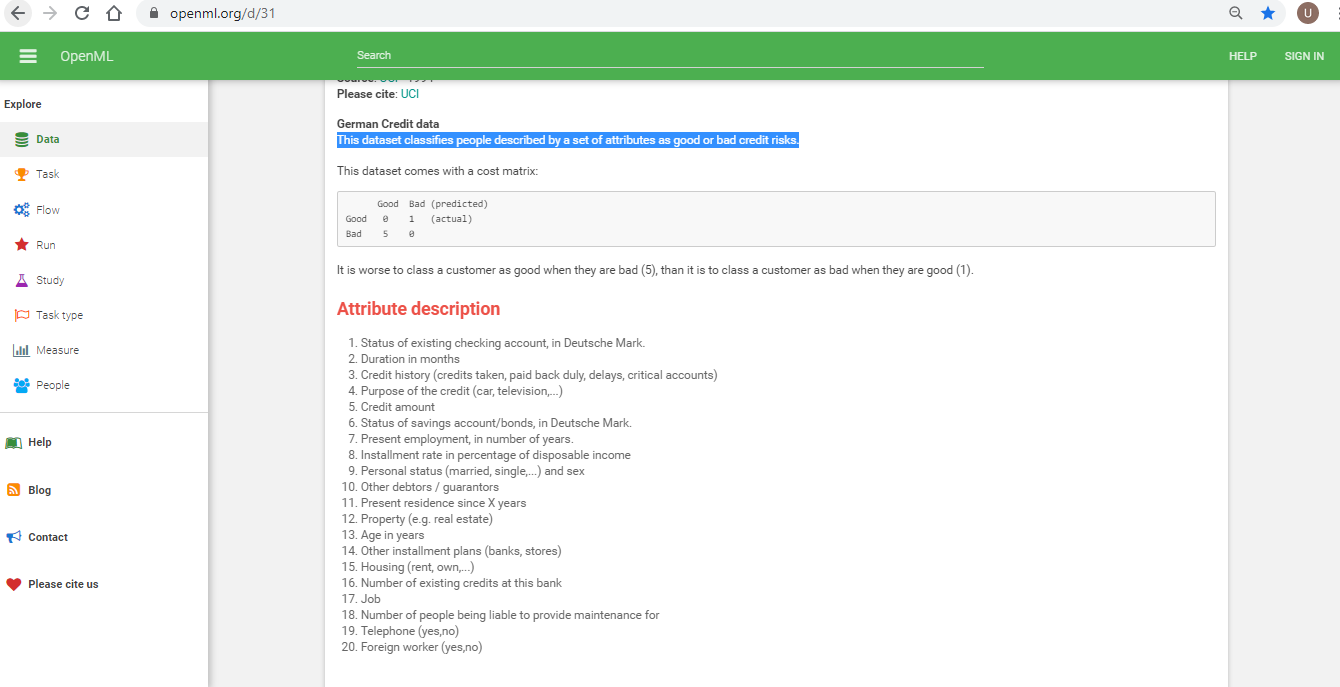

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
data=pd.read_csv("/content/dataset_31_credit-g.csv")
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [156]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

No missing value is there

In [157]:
extra=data.iloc[:,[4,12]]
extra.head()

,credit_amount,age
0,1169,67
1,5951,22
2,2096,49
3,7882,45
4,4870,53


In [158]:
cred=extra.iloc[:,[0]]
extra.drop(['credit_amount'],axis=1,inplace=True)
cred.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,credit_amount
0,1169
1,5951
2,2096
3,7882
4,4870


In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#default function for standardising
cred=scaler.fit_transform(cred)
cred=pd.DataFrame(cred)
cred.head()

,0
0,-0.745131
1,0.949817
2,-0.416562
3,1.634247
4,0.566664


In [160]:
data.drop(['credit_amount','age'],axis=1,inplace=True)

In [161]:
data.head()

,checking_status,duration,credit_history,purpose,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,'no known savings','>=7',4,'male single',none,4,'real estate',none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,'<100','4<=X<7',2,'male single',none,3,'real estate',none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car','<100','1<=X<4',3,'male single',none,4,'no known property',none,'for free',2,skilled,2,none,yes,bad


In [162]:
from sklearn import preprocessing 
data1=data.apply(preprocessing.LabelEncoder().fit_transform)
data1.head()

,checking_status,duration,credit_history,purpose,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,2,1,7,4,3,3,3,2,3,2,1,1,1,3,0,1,1,1
1,0,29,3,7,2,0,1,0,2,1,2,1,1,0,3,0,0,1,0
2,3,8,1,4,2,1,1,3,2,2,2,1,1,0,2,1,0,1,1
3,1,26,3,5,2,1,1,3,1,3,0,1,0,0,3,1,0,1,1
4,1,17,2,1,2,0,2,3,2,3,1,1,0,1,3,1,0,1,0


In [163]:
X1 = pd.concat([data1,extra,cred], axis=1)
X1.head()

,checking_status,duration,credit_history,purpose,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,age,0
0,1,2,1,7,4,3,3,3,2,3,2,1,1,1,3,0,1,1,1,67,-0.745131
1,0,29,3,7,2,0,1,0,2,1,2,1,1,0,3,0,0,1,0,22,0.949817
2,3,8,1,4,2,1,1,3,2,2,2,1,1,0,2,1,0,1,1,49,-0.416562
3,1,26,3,5,2,1,1,3,1,3,0,1,0,0,3,1,0,1,1,45,1.634247
4,1,17,2,1,2,0,2,3,2,3,1,1,0,1,3,1,0,1,0,53,0.566664


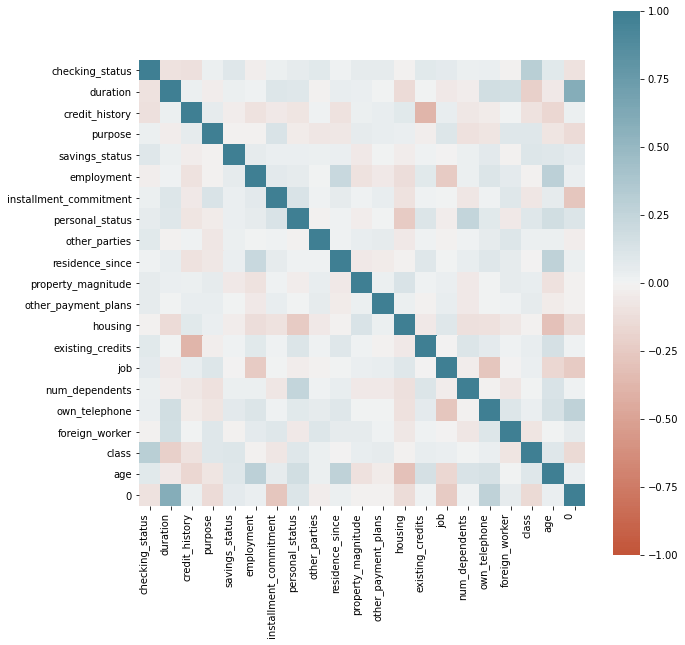

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X1.corr()
fig= plt.subplots(figsize = [10,10])
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.show()

As no feature is highly correlated with the Class(Target Varaible) .....Hence will keep as  the features in the model

In [165]:
y=data1.pop("class")
y.head()

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
seed=16
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=test_size, random_state=seed)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (800, 21)
X_test Shape:  (200, 21)
y_train Shape:  (800,)
y_test Shape:  (200,)


In [167]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten

filepath = "Remedial_Assign4_Model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30, min_delta=0.01, baseline=0.99)

callbacks_list = [checkpoint, es]

model1=models.Sequential()
model1.add(layers.Dense(128,activation="sigmoid",input_shape=(21,)))
model1.add(Dropout(0.65))
model1.add(layers.Dense(64,activation="relu"))
model1.add(Dropout(0.65))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 128)               2816      
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 65        
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [168]:
from keras.optimizers import SGD
opt = SGD(lr=0.1)
model1.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

In [169]:
history=model1.fit(X_train, y_train, epochs=150,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/150
 1/20 [>.............................] - ETA: 0s - loss: 0.9917 - accuracy: 0.6562
Epoch 00001: val_accuracy improved from -inf to 0.73750, saving model to Remedial_Assign4_Model.hdf5
20/20 [==============================] - 0s 11ms/step - loss: 0.7751 - accuracy: 0.6125 - val_loss: 0.5959 - val_accuracy: 0.7375
Epoch 2/150
 1/20 [>.............................] - ETA: 0s - loss: 0.6704 - accuracy: 0.6250
Epoch 00002: val_accuracy did not improve from 0.73750
20/20 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6562 - val_loss: 0.6355 - val_accuracy: 0.7375
Epoch 3/150
 1/20 [>.............................] - ETA: 0s - loss: 0.6874 - accuracy: 0.5625
Epoch 00003: val_accuracy did not improve from 0.73750
20/20 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6687 - val_loss: 0.6264 - val_accuracy: 0.7375
Epoch 4/150
 1/20 [>.............................] - ETA: 0s - loss: 0.6193 - accuracy: 0.5938
Epoch 00004: val_accu

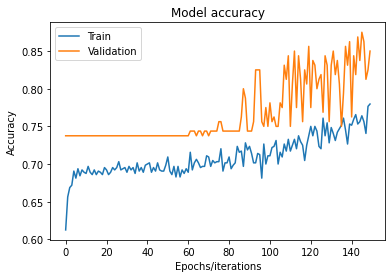

In [170]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

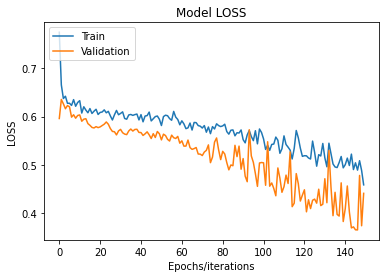

In [171]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("LOSS")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

In [172]:
from keras.models import load_model
saved_model = load_model('Remedial_Assign4_Model.hdf5')
test_loss, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.8f' % ( test_acc))
print('Test Loss: %.3f' % ( test_loss))

Test Accuracy: 0.85500002
Test Loss: 0.394


Test Accuracy:  0.85500002

Accuracy coming around ~ 67% in Training

Validation & Testing Dataset ~85%

Plot of accuracy of Train & Validation done above

Callback is used here to save the improved model.

Hyper-Parameter used here are:

1)Made 1st Layer of Sigmoid Activation and the input dimension = 21 as 21 variables in dataset.

2)Added next 1 relu layers and output layers has 1 node as 2 classes

3)Optimizer used:SGD for faster convergence.

4)Metrics: Accuracy to find accuray atlast.

5)loss='binary_crossentropy' as it has 2 different classes

6)Callbackused are: earlystopping, modelcheckpoint.

7)Epoch=150



---

---



